In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


    2020-03-24 - Reading the GISS Exported Data.ipynb

In [2]:
from sci378 import *

Version 0.0.3


In [3]:
data=pd.read_csv("data/station_temperature_data.csv.gz",index_col=False)

In [4]:
info=pd.read_excel("data/station_info.xlsx")

In [5]:
info.head()

,Unnamed: 0,ID,Station,Latitude,Longitude,Brightness,Elevation
0,0,ACW00011604,SAVE,57.7667,11.8667,45.0,18.0
1,1,AE000041196,SHARJAH_INTER_AIRP,25.3330,55.5170,39.0,34.0
2,2,AEM00041184,RAS_AL_KHAIMAH_INTE,25.6170,55.9330,17.0,31.0
3,3,AEM00041194,DUBAI_INTL,25.2550,55.3640,104.0,10.4
4,4,AEM00041216,ABU_DHABI_BATEEN_AIR,24.4300,54.4700,114.0,3.0


In [6]:
info['Brightness']

0         45.0
1         39.0
2         17.0
3        104.0
4        114.0
         ...  
27435      0.0
27436      8.0
27437     24.0
27438      0.0
27439     12.0
Name: Brightness, Length: 27440, dtype: float64

In [7]:
data.tail()

,Unnamed: 0,time,SAVE,SHARJAH_INTER_AIRP,RAS_AL_KHAIMAH_INTE,DUBAI_INTL,ABU_DHABI_BATEEN_AIR,ABU_DHABI_INTL,AL_AIN_INTL,NORTH_SALANG,...,BULAWAYO_GOETZ_OBS,BULAWAYO_AIRPORT,WEST_NICHOLSON,MASVINGO,BUFFALO_RANGE,CHIPINGE,BEITBRIDGE,HARARE_BELVEDERE,GRAND_REEF,GWELO
136,136,2016,28.198333,27.810000,NaN,29.545833,NaN,NaN,28.935000,NaN,...,20.777273,NaN,NaN,20.6625,NaN,20.178333,NaN,NaN,NaN,NaN
137,137,2017,28.298333,28.335000,NaN,30.027500,NaN,31.6730,29.655000,NaN,...,18.564286,NaN,NaN,19.0200,NaN,NaN,NaN,NaN,NaN,NaN
138,138,2018,28.081667,28.904545,NaN,30.098182,NaN,29.7925,29.965455,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,139,2019,28.266667,28.251667,NaN,29.585833,NaN,29.4000,29.061667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,140,2020,29.550000,19.730000,NaN,21.280000,NaN,20.5750,19.460000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'BERKELEY')

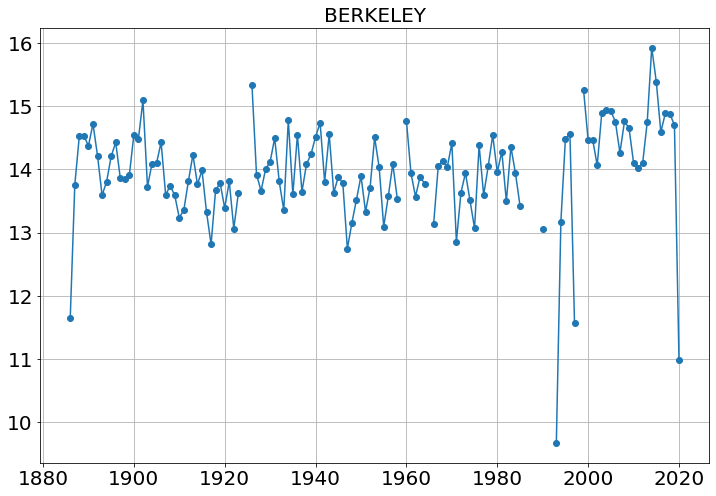

In [8]:
station='BERKELEY'
x=data['time']
y=data[station]
plot(x,y,'-o')
title(station)

In [9]:
x,y   # lots of nans!

(0      1880
 1      1881
 2      1882
 3      1883
 4      1884
        ... 
 136    2016
 137    2017
 138    2018
 139    2019
 140    2020
 Name: time, Length: 141, dtype: int64,
 0            NaN
 1            NaN
 2            NaN
 3            NaN
 4            NaN
          ...    
 136    14.590000
 137    14.888182
 138    14.879167
 139    14.698182
 140    10.990000
 Name: BERKELEY, Length: 141, dtype: float64)

In [10]:
def get_xy(data,station):
    x,y=array(data[['time',station]].dropna()).T    
    return x,y

In [11]:
x,y=get_xy(data,station)

In [12]:
model=ols('y ~ x', data={'y':y,'x':x})
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.278
Date:                Tue, 28 Apr 2020   Prob (F-statistic):              0.260
Time:                        19:18:19   Log-Likelihood:                -148.13
No. Observations:                 124   AIC:                             300.3
Df Residuals:                     122   BIC:                             305.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9014      3.578      2.767      0.007       2.818      16.984
x              0.0021      0.002      1.131      0.260      -0.002       0.006
==============================================================================
Omnibus:                       71.807   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              405.899
Skew:                          -1.941   Prob(JB):                     7.25e-89
Kurtosis:                      10.968   Cond. No.                     9.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

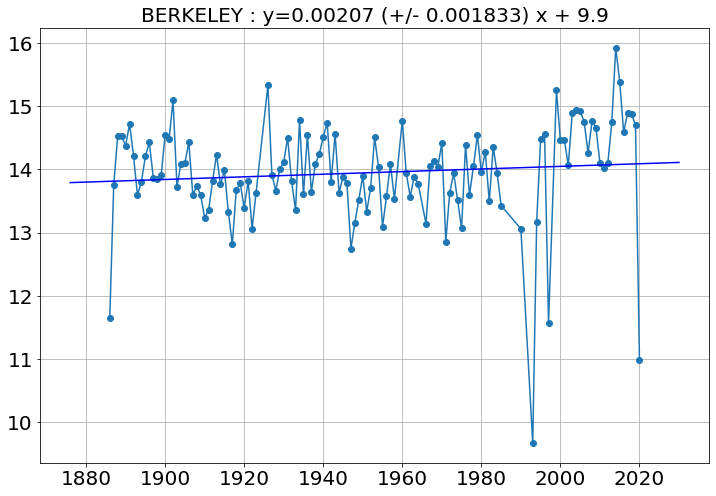

In [13]:
xx=linspace(min(x)-10,max(x)+10,20)
yy=results.predict({'x':xx})

m=results.params['x']
mσ=results.bse['x']

b=results.params['Intercept']

plot(x,y,'-o')
title(station+" : y=%.3g (+/- %.4g) x + %.3g" % (m,mσ,b))
plot(xx,yy,'b-')

In [14]:
results.bse

Intercept    3.578023
x            0.001833
dtype: float64

## go through all the stations

**is there a relationship between the temperature trend and brightness?**

(ideally) 20,000 stations

1. x variable: brightness - 20,000 values
2. y variable: slope - 20,000 values

### Recipe

1. loop through stations, for each:
    1. get the brightness
    2. get the trends (slope)
    3. get the slope uncertainties (m-σ)
    3. add them to lists/Storage

things to consider

1. weighted by the m-σ
2. errorbars

In [15]:
station_names=data.columns[2:]
station_names[:20]

Index(['SAVE', 'SHARJAH_INTER_AIRP', 'RAS_AL_KHAIMAH_INTE', 'DUBAI_INTL',
       'ABU_DHABI_BATEEN_AIR', 'ABU_DHABI_INTL', 'AL_AIN_INTL', 'NORTH_SALANG',
       'MAZAR_I_SHARIF', 'HERAT', 'KABUL_INTL', 'KANDAHAR_AIRPORT',
       'CHAKHCHARAN', 'ALGER_DAR_EL_BEIDA', 'EL_GOLEA', 'IN_AMENAS',
       'TAMANRASSET', 'ORAN_HOPITAL_MILITAIRE', 'ANNABA_CAP_DE_GARDE',
       'ALGIERS_VILLE_UNIVERSITE'],
      dtype='object')

In [16]:
station='SHARJAH_INTER_AIRP'
info[info['Station']==station]

,Unnamed: 0,ID,Station,Latitude,Longitude,Brightness,Elevation
1,1,AE000041196,SHARJAH_INTER_AIRP,25.333,55.517,39.0,34.0


In [17]:
float(info[info['Station']==station]['Brightness'])

39.0

In [26]:
station='SAVE'

In [28]:
a=array(info[info['Station']==station]['Brightness'])[0]

In [31]:
type(a)

numpy.float64

In [37]:
S=Storage()
station_subset=[]
for station in station_names[:200]:
    #brightness=float(info[info['Station']==station]['Brightness'])
    brightness=array(info[info['Station']==station]['Brightness'])[0]
    latitude=array(info[info['Station']==station]['Latitude'])[0]
    longitude=array(info[info['Station']==station]['Longitude'])[0]
    elevation=array(info[info['Station']==station]['Elevation'])[0]
    x,y=get_xy(data,station)
    
    if len(x)==0:
        continue 
        
    model=ols('y ~ x', data={'y':y,'x':x})
    results=model.fit()
    m=results.params['x']
    mσ=results.bse['x']
    
    S+=brightness,m,mσ,latitude,longitude,elevation
    
    station_subset.append(station)
    print(station)
    
brightness,m,mσ,latitude,longitude,elevation= array(S)

SAVE
SHARJAH_INTER_AIRP
RAS_AL_KHAIMAH_INTE
DUBAI_INTL
ABU_DHABI_BATEEN_AIR
ABU_DHABI_INTL
AL_AIN_INTL
MAZAR_I_SHARIF
HERAT
KABUL_INTL
KANDAHAR_AIRPORT
ALGER_DAR_EL_BEIDA
EL_GOLEA
IN_AMENAS
TAMANRASSET
ANNABA_CAP_DE_GARDE
ALGIERS_VILLE_UNIVERSITE
ALGIERS_CAP_CAXINE
FORT_NATIONAL
BEJAIA_BOUGIE_PORT
CONSTANTINE
ORLEANSVILLE_CHLEF
SETIF
TEBESSA
BISKRA
LAGHOUAT
GERYVILLE_EL_BAYADH
JIJEL
JIJEL_PORT
ANNABA
EL_KALA
SOUMMAM
GUELMA
TENES
AIN_BESSAM
MOHAMED_BOUDIAF_INTL
OUM_EL_BOUAGHI
SOUK_AHRAS
ECH_CHELIFF
MILIANA
MEDEA
BORDJ_BOU_ARRERIDJ
SETIF_AIN_ARNAT
ARZEW
MOSTAGANEM
ORAN_PORT
M'SILA
CHEIKH_LARBI_TEBESSI
KHENCHELLA
ES_SENIA
MASCARA_MATEMORE
GHRISS
BOU_CHEKIF
KSAR_CHELLALA
BOU_SAADA
BENI_SAF
MAGHNIA
ZENATA
DJELFA_TLETSI
SAIDA
EL_KHEITER
MECHERIA
EL_BAYADH
SIDI_MAHDI
NAAMA
GUEMAR
AIN_SEFRA
NOUMERAT
BECHAR
OUARGLA
OUED_IRARA
BENI_ABBES
TIMIMOUN
TOUAT_CHEIKH_SIDI_MOHAMED_BEL
IN_SALAH
ILLIZI_TAKHAMALT
TINDOUF
TISKA
BORDJ_BADJ_MOKHTAR
ADRAR
TOUGGOURT
HASSI_MESSOUD
EL_OUED
BENI_SAF_ALGERIA
GHARDAI

In [38]:
latitude

array([ 57.7667,  25.333 ,  25.617 ,  25.255 ,  24.43  ,  24.433 ,
        24.262 ,  36.7   ,  34.21  ,  34.566 ,  31.5   ,  36.7167,
        30.5667,  28.05  ,  22.8   ,  36.97  ,  36.78  ,  36.8   ,
        36.63  ,  36.75  ,  36.3697,  36.17  ,  36.18  ,  35.42  ,
        34.85  ,  33.7997,  33.68  ,  36.795 ,  36.817 ,  36.822 ,
        36.9   ,  36.712 ,  36.467 ,  36.5   ,  36.317 ,  36.276 ,
        35.867 ,  36.283 ,  36.213 ,  36.3   ,  36.283 ,  36.067 ,
        36.178 ,  35.817 ,  35.883 ,  35.7   ,  35.667 ,  35.432 ,
        35.467 ,  35.624 ,  35.6   ,  35.208 ,  35.341 ,  35.167 ,
        35.333 ,  35.3   ,  34.82  ,  35.017 ,  34.683 ,  34.867 ,
        34.15  ,  33.536 ,  33.667 ,  33.068 ,  33.267 ,  33.511 ,
        32.767 ,  32.384 ,  31.646 ,  31.917 ,  31.673 ,  30.133 ,
        29.237 ,  27.838 ,  27.233 ,  26.724 ,  27.7   ,  24.293 ,
        21.333 ,  27.88  ,  33.12  ,  31.7   ,  33.5   ,  35.3   ,
        32.4   ,  24.55  ,  27.    ,  26.5   ,  36.8   ,  41.5

In [39]:
m,mσ

(array([ 0.02495209, -0.00172297,  0.01861586,  0.01213248,  0.03736059,
        -0.00916231, -0.05297426, -0.05879145,  0.00397682,  0.02309041,
        -0.01600813,  0.01094333,  0.0381596 ,  0.0236307 ,  0.02490372,
         0.08878516,  0.01020392,  0.06584557,  0.01815946,  0.02320351,
         0.04227132,  0.01334745,  0.02741944,  0.02526371,  0.01465224,
         0.02570582,  0.00628728, -0.00748439, -0.07227125,  0.02409313,
        -0.05773738,  0.03583655, -0.03926696,  0.02211531, -0.03687355,
         0.00545233, -0.03895238, -0.01918282,  0.02594372,  0.02315015,
         0.0072426 , -0.0516757 ,  0.05248988, -0.00861013,  0.02912248,
        -0.02840181, -0.08141835,  0.01773872,  0.0265235 ,  0.00663492,
        -0.0233998 , -0.00063203, -0.01741799, -0.06276933, -0.0258893 ,
         0.01508527, -0.01485107, -0.01134335,  0.01403227, -0.01856364,
         0.01884379, -0.03931175,  0.03411238, -0.03103525,  0.01701887,
         0.07122669, -0.00765956,  0.02605532,  0.0

In [40]:
x=brightness
y=m
yerr=mσ

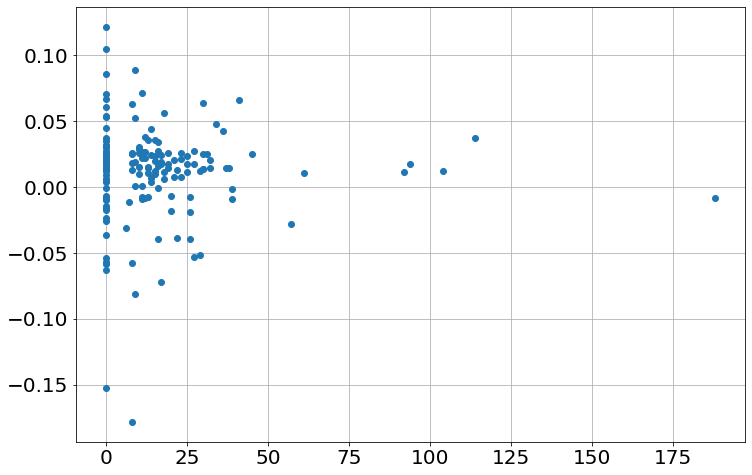

In [41]:
plot(x,y,'o')

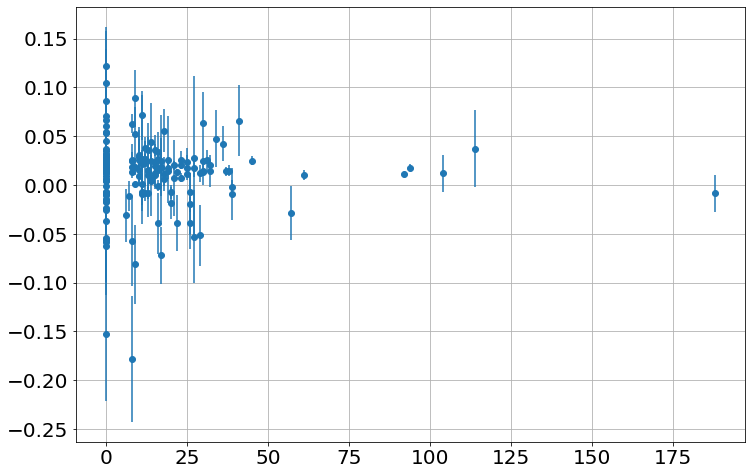

In [42]:
errorbar(x,y,yerr,fmt='o');

In [43]:
new_info=pd.DataFrame({
    'Station':station_subset,
    'm':m,
    'brightness':brightness,
    'longitude':longitude,
    'latitude':latitude,
    'elevation':elevation
})
new_info.to_excel('data/new_info.xlsx')
new_info

,Station,m,brightness,longitude,latitude,elevation
0,SAVE,0.024952,45.0,11.8667,57.7667,18.0
1,SHARJAH_INTER_AIRP,-0.001723,39.0,55.5170,25.3330,34.0
2,RAS_AL_KHAIMAH_INTE,0.018616,17.0,55.9330,25.6170,31.0
3,DUBAI_INTL,0.012132,104.0,55.3640,25.2550,10.4
4,ABU_DHABI_BATEEN_AIR,0.037361,114.0,54.4700,24.4300,3.0
...,...,...,...,...,...,...
152,VILLA_DOLORES,0.009966,15.0,-65.1460,-31.9450,583.7
153,CORDOBA_OBSERVATORIO,0.017682,94.0,-64.1830,-31.4000,426.0
154,PILAR_OBSERVATORIO,0.015549,16.0,-63.8830,-31.6670,338.0
155,COMODORO_PIERRESTEGUI,0.018198,0.0,-57.9970,-31.2970,34.1


In [29]:
len(elevation)

157

In [53]:
info[info['Brightness']>150]

,Unnamed: 0,ID,Station,Latitude,Longitude,Brightness,Elevation
55,55,AGM00060452,ARZEW,35.8170,-0.2670,188.0,4.0
3336,3336,CA003012195,EDMONTON,53.5500,-113.5000,171.0,658.0
3337,3337,CA003012202,EDMONTON_CITY_CENTRE_AWOS,53.5667,-113.5167,178.0,671.0
3338,3338,CA003012203,EDMONTON_CALDER,53.5667,-113.5167,178.0,671.0
3341,3341,CA003012208,EDMONTON_CITY_CENTRE_A,53.5667,-113.5167,178.0,671.0
3342,3342,CA003012209,EDMONTON_MUNICIPAL_CR10,53.5667,-113.5167,178.0,671.0
3495,3495,CA003031090,CALGARY_GLENMORE_DAM,51.0167,-114.1000,161.0,1067.0
3564,3564,CA003036652,UNIVERSITY_OF_CALGARY,51.0833,-114.1333,151.0,1112.0
3831,3831,CA004016641,REGINA_CITY_GREENHOUSES,50.4667,-104.6000,171.0,579.0
4190,4190,CA005023262,WINNIPEG_THE_FORKS,49.8833,-97.1333,152.0,230.0
